In [1]:
import tensorflow as tf 
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# 변수 정의

num = 10
epochs = 300
learning_rate = 0.2

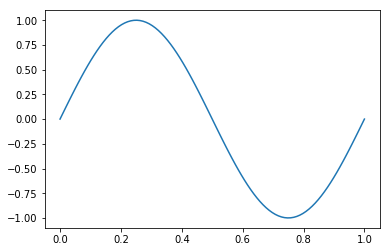

In [3]:
# 정상적인 sin(2πx)의 그래프

sinx = np.linspace(0.0, 1.0, 100)
siny = np.sin(2 * np.pi * sinx)

plt.plot(sinx, siny)
plt.show()

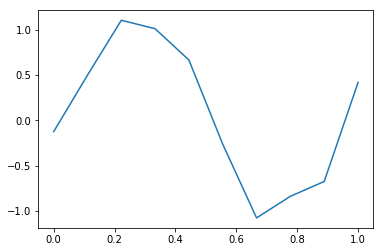

In [4]:
# sin + noise 그래프

train_x = np.linspace(0.0, 1.0, num)
n = np.random.uniform(-0.5, 0.5, num)
train_y = np.sin(2 * np.pi * train_x)
train_y += n

plt.plot(train_x, train_y)
plt.show()

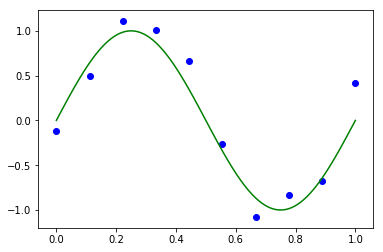

In [5]:
plt.scatter(train_x, train_y, color="blue")
#fig, ax = plt.subplots()
plt.plot(sinx, siny, color='green')
plt.show()

In [6]:
# tensorflow 변수

X = tf.placeholder(tf.float32)
Y = tf.placeholder(tf.float32)

W1 = tf.Variable(tf.random_normal([1]), name='weight1')
W2 = tf.Variable(tf.random_normal([1]), name='weight2')
W3 = tf.Variable(tf.random_normal([1]), name='weight3')
b = tf.Variable(tf.random_normal([1]), name='bias')

Y_pred = tf.add(tf.multiply(X, W1), b)
Y_pred = tf.add(tf.multiply(tf.pow(X, 2), W2), Y_pred)
Y_pred = tf.add(tf.multiply(tf.pow(X, 3), W3), Y_pred)

#Y_pred = tf.Variable(tf.random_normal([1]), name='bias')
#for i in range(1, num_coeffs):
#    W = tf.Variable(tf.random_normal([1]), name='weight_%d' % i)
#    Y_pred = tf.add(tf.multiply(tf.pow(X, i), W), Y_pred)

In [7]:
# cost 함수

cost = tf.reduce_sum(tf.pow(Y_pred - Y, 2))

In [8]:
# optimizer

optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

In [9]:
# 변수 초기화

init = tf.global_variables_initializer()

epoch : 0, cost : 15.0799
epoch : 10, cost : 7.34298
epoch : 20, cost : 6.2659
epoch : 30, cost : 5.83133
epoch : 40, cost : 5.65565
epoch : 50, cost : 5.57523
epoch : 60, cost : 5.52358
epoch : 70, cost : 5.47565
epoch : 80, cost : 5.42343
epoch : 90, cost : 5.36549
epoch : 100, cost : 5.30268
epoch : 110, cost : 5.23634
epoch : 120, cost : 5.16773
epoch : 130, cost : 5.09786
epoch : 140, cost : 5.02744
epoch : 150, cost : 4.95701
epoch : 160, cost : 4.88692
epoch : 170, cost : 4.8174
epoch : 180, cost : 4.7486
epoch : 190, cost : 4.68064
epoch : 200, cost : 4.61357
epoch : 210, cost : 4.54743
epoch : 220, cost : 4.48224
epoch : 230, cost : 4.41801
epoch : 240, cost : 4.35473
epoch : 250, cost : 4.2924
epoch : 260, cost : 4.23102
epoch : 270, cost : 4.17057
epoch : 280, cost : 4.11104
epoch : 290, cost : 4.05243
[ 0.95738244  0.79833853  0.51150274  0.16578233 -0.16991502 -0.42668176
 -0.53561044 -0.4277935  -0.03432417  0.71370649]


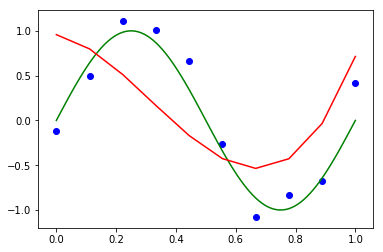

In [10]:
# 세션 시작

with tf.Session() as sess:
    
    # 초기화 실행
    sess.run(init)
    
    for epoch in range(epochs):
        for (x, y) in zip(train_x, train_y):
            sess.run(optimizer, feed_dict={X:x, Y:y})
        
        if epoch % 10 == 0:
            c = sess.run(cost, feed_dict={X:train_x, Y:train_y})
            print("epoch : " + str(epoch) + ", cost : " + str(c))
                    
            
    w1 = sess.run(W1)
    w2 = sess.run(W2)
    w3 = sess.run(W3)
    bias = sess.run(b)
               
    print(Y_pred.eval(feed_dict={X:train_x}, session=sess))
    plt.scatter(train_x, train_y, color="blue")
    #fig, ax = plt.subplots()
    plt.plot(sinx, siny, color='green')
    plt.plot(train_x, Y_pred.eval(feed_dict={X:train_x}, session=sess), 'r')
    plt.show()